#  Title: Fandango Movie Ratings investigation

# Introduction
# We'll analyze recent movie ratings from Fandango to determine if there is a change in the rating system after Hickey's analysis 

In [1]:
import pandas as pd
fscDF = pd.read_csv('fandango_score_comparison.csv')
fscDF.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
mrDF = pd.read_csv('movie_ratings_16_17.csv')
mrDF.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [3]:
fandango_previousDF = fscDF[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_previousDF.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [4]:
fandango_afterDF = mrDF[['movie', 'year', 'fandango']]
fandango_afterDF.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


We changed our goal to finding out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

With the new goal, we now have two populations that we want to describe and compare with each other:

All Fandango's ratings for popular movies released in 2015.
All Fandango's ratings for popular movies released in 2016.
The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.



In [5]:
fandango_previousDF.sample(30,random_state=1)


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
98,Get Hard (2015),4.0,3.9,5933,0.1
66,The Gift (2015),4.0,3.7,2680,0.3
53,Hot Pursuit (2015),4.0,3.7,2618,0.3
75,San Andreas (2015),4.5,4.3,9749,0.2
121,The Stanford Prison Experiment (2015),4.0,3.9,51,0.1
74,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,0.2
119,Phoenix (2015),3.5,3.4,70,0.1
128,Mission: Impossible â€“ Rogue Nation (2015),4.5,4.4,8357,0.1
44,Kingsman: The Secret Service (2015),4.5,4.2,15205,0.3
58,Seventh Son (2015),3.5,3.2,1213,0.3


Modify fandango_previousDF to add Year column from the FILM column

In [6]:
fandango_previousDF['Year'] = fandango_previousDF['FILM'].str[-5:-1]
fandango_previousDF.head()

C:\Users\kruiz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [7]:
fandango_previousDF['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [8]:
fandango_2015 = fandango_previousDF[fandango_previousDF['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()


2015    129
Name: Year, dtype: int64

In [9]:
fandango_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [10]:
fandango_afterDF = fandango_afterDF.rename(columns = {'year':'Year'})
fandango_afterDF['Year'].value_counts()

2016    191
2017     23
Name: Year, dtype: int64

In [11]:
fandango_2016 = fandango_afterDF[fandango_afterDF['Year'] == 2016].copy()
fandango_2016['Year'].value_counts()


2016    191
Name: Year, dtype: int64

In [12]:
fandango_2016.head()

,movie,Year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


# Analysis
Now we will analyze the difference between Fandango's ratings for 2015 and 2016

Text(0.5,0,'Rating')

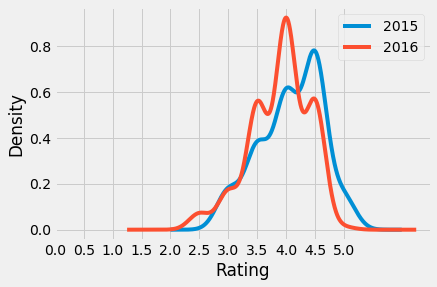

In [13]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = "2015", legend = True)
plt.xticks(arange(0,5.1,0.5))
plt.xlabel("Rating")

fandango_2016['fandango'].plot.kde(label = "2016", legend = True)
plt.xticks(arange(0,5.1,0.5))
plt.xlabel("Rating")


# Analysis of kernel density plots
Both distributions are left skewed. The 2015 is more skewed.

The left skew suggests that movies on Fandango are given mostly high and very high fan ratings. 

The slight left shift of the 2016 distribution is very interesting for our analysis. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

# Comparing Relative Frequencies
It is fine to compare using absolute frequencies in this case, as the total numbers are not very different. There were 129 movies in 2015 analysis, and 191 in 2016.

To analyze if percentages of relative frequencies are better, we do below analysis.

In [14]:
print('2015' + '\n' + '-' * 16) 
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100


2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [15]:
print('2016' + '\n' + '-' * 16) 
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100


2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

# Analysis of frequency tables
Above analysis shows that this is more readable.
Clearly in 2016, the top percentage rating is 4.0, and it was 4.5 in 2015.

There is also a shift in ratings as 2.5 rating is not occurring in 2015, but it occurs in 2016. 
The 5.0 rating in 2016 has much lower percentage compared to previous year. (0.52 vs 6.98)

#  Determining the direction of the change


In [16]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
median_2015 = fandango_2015['Fandango_Stars'].median()
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]

print(mean_2015)
print(median_2015)
print(mode_2015)

4.0852713178294575
4.0
4.5


In [17]:
mean_2016 = fandango_2016['fandango'].mean()
median_2016 = fandango_2016['fandango'].median()
mode_2016 = fandango_2016['fandango'].mode()[0]

print(mean_2016)
print(median_2016)
print(mode_2016)

3.887434554973822
4.0
4.0


In [18]:
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary


,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


# Difference in two years
From 2015 to 2016, the mean rating on Fandango has reduced from 4.09 to 3.89. 
The median still remains 4
But the mode, which is most common rating also changed from 4.5 to 4


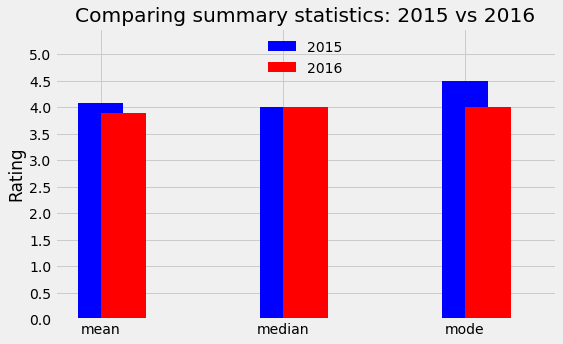

In [19]:
plt.style.use('fivethirtyeight')

summary['2015'].plot.bar(color = 'blue', align = 'center', label = '2015', width = 0.25)
# The key below is to align to edge for 2016 plot to notice difference and not show it on top of 
# 2015 chart
summary['2016'].plot.bar(color = 'red', align = 'edge', label = '2016', width = 0.25, rot = 0,
                        figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016')
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Rating')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

# Conclusion
Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.